<a href="https://colab.research.google.com/github/Talhaahmd/Personality-Evaluation-Model/blob/main/Handwriting_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

In [5]:
img = "/content/handwriting.jpeg"
img = cv2.imread(img, 0)

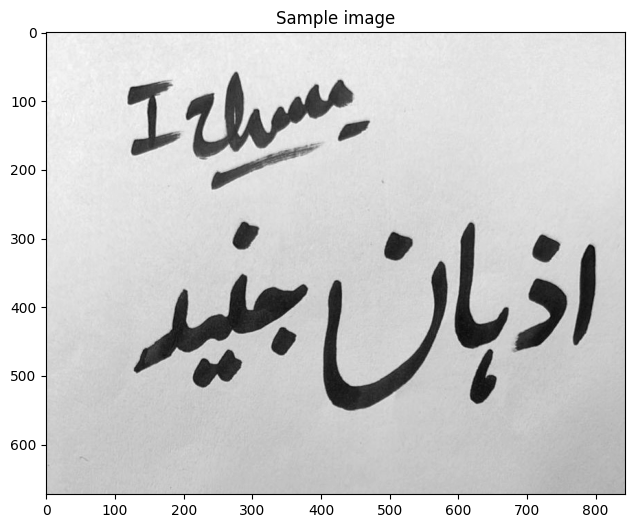

In [8]:
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.title("Sample image")
plt.show()

In [9]:
mean_intensity = np.mean(img)
std_intensity = np.std(img)
median_intensity = np.median(img)

In [10]:
glcm = feature.greycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = feature.greycoprops(glcm, 'contrast')
dissimilarity = feature.greycoprops(glcm, 'dissimilarity')
homogeneity = feature.greycoprops(glcm, 'homogeneity')
ASM = feature.greycoprops(glcm, 'ASM')
energy = feature.greycoprops(glcm, 'energy')
correlation = feature.greycoprops(glcm, 'correlation')

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [11]:
edges = cv2.Canny(img, 100, 200)


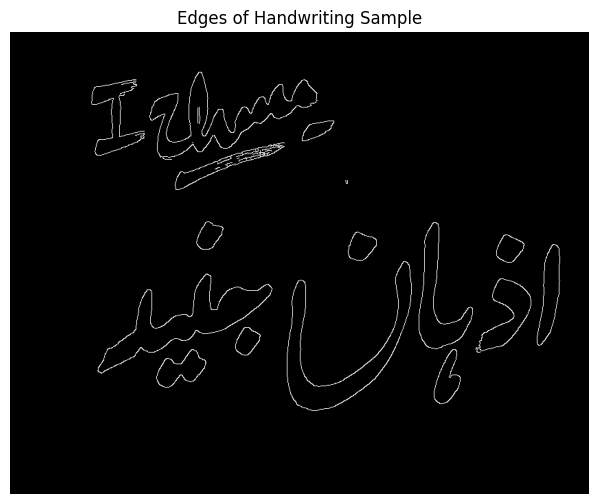

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title("Edges of Handwriting Sample")
plt.axis('off')
plt.show()

In [15]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
num_contours = len(contours)

In [17]:
stroke_widths = []
stroke_heights = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    stroke_widths.append(w)
    stroke_heights.append(h)

avg_stroke_width = np.mean(stroke_widths)
avg_stroke_height = np.mean(stroke_heights)

In [18]:
if avg_stroke_width > 30:
    personality_label = "Extrovert"
else:
    personality_label = "Introvert"


In [19]:
word_spacing = []
for i in range(1, len(contours)):
    x1, y1, w1, h1 = cv2.boundingRect(contours[i - 1])
    x2, y2, w2, h2 = cv2.boundingRect(contours[i])
    spacing = x2 - (x1 + w1)
    if spacing > 0:
        word_spacing.append(spacing)

avg_word_spacing = np.mean(word_spacing)
if avg_word_spacing > 10:
    independence_label = "Independent"
else:
    independence_label = "Not Independent"

In [20]:
loopiness = 0
pointiness = 0
for cnt in contours:
    hull = cv2.convexHull(cnt)
    if cv2.contourArea(hull) > 0:
        solidity = float(cv2.contourArea(cnt)) / cv2.contourArea(hull)
        if solidity > 0.8:
            loopiness += 1
        else:
            pointiness += 1

if loopiness > pointiness:
    edge_label = "Spontaneous"
else:
    edge_label = "Skeptical"

In [21]:
combined_label = f"Personality: {personality_label}, Independence: {independence_label}, Edge Type: {edge_label}"

In [22]:
print("\nCombined Label:")
print(combined_label)


Combined Label:
Personality: Extrovert, Independence: Independent, Edge Type: Skeptical


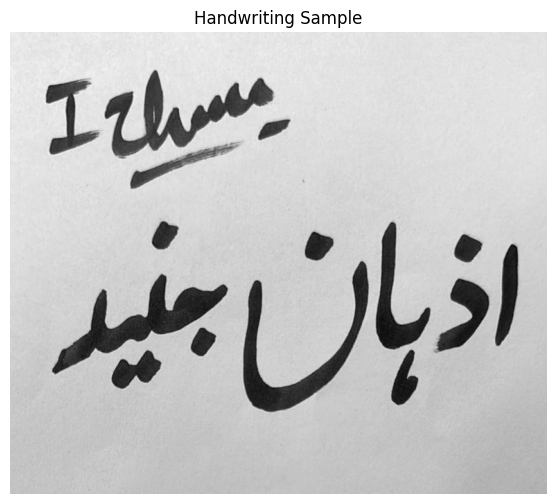

Mean Intensity: 171.46680659670164
Standard Deviation of Intensity: 44.903610473933995
Median Intensity: 184.0
Skewness: -2.327155940619551
Kurtosis: 4.124144193974477


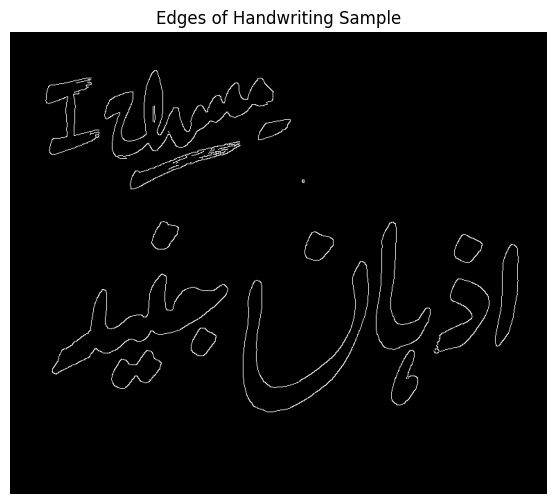

Number of Contours: 46
Average Stroke Width: 62.45652173913044
Average Stroke Height: 60.47826086956522

Combined Label:
Personality: Extrovert, Independence: Independent, Edge Type: Skeptical


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, measure
from scipy import stats

# Load the image in grayscale
img_path = "/content/WhatsApp Image 2024-05-23 at 00.35.18_bc8ee552.jpg"
img = cv2.imread(img_path, 0)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.title("Handwriting Sample")
plt.axis('off')
plt.show()

# Extract basic statistical features
mean_intensity = np.mean(img)
std_intensity = np.std(img)
median_intensity = np.median(img)
skewness = stats.skew(img, axis=None)
kurtosis = stats.kurtosis(img, axis=None)

print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation of Intensity: {std_intensity}")
print(f"Median Intensity: {median_intensity}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Extract structural features using edge detection
edges = cv2.Canny(img, 100, 200)

# Display edges
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title("Edges of Handwriting Sample")
plt.axis('off')
plt.show()

# Extract contour features
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
num_contours = len(contours)

print(f"Number of Contours: {num_contours}")

# Extract average stroke width and height
stroke_widths = []
stroke_heights = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    stroke_widths.append(w)
    stroke_heights.append(h)

avg_stroke_width = np.mean(stroke_widths)
avg_stroke_height = np.mean(stroke_heights)

print(f"Average Stroke Width: {avg_stroke_width}")
print(f"Average Stroke Height: {avg_stroke_height}")

# Label based on average stroke width
if avg_stroke_width > 30:
    personality_label = "Extrovert"
else:
    personality_label = "Introvert"

# Determine spacing between words
word_spacing = []
for i in range(1, len(contours)):
    x1, y1, w1, h1 = cv2.boundingRect(contours[i - 1])
    x2, y2, w2, h2 = cv2.boundingRect(contours[i])
    spacing = x2 - (x1 + w1)
    if spacing > 0:
        word_spacing.append(spacing)

avg_word_spacing = np.mean(word_spacing)
if avg_word_spacing > 10:  # You may adjust the threshold as needed
    independence_label = "Independent"
else:
    independence_label = "Not Independent"

# Check for loopy or pointy edges to suggest spontaneity or skepticism
loopiness = 0
pointiness = 0
for cnt in contours:
    hull = cv2.convexHull(cnt)
    if cv2.contourArea(hull) > 0:
        solidity = float(cv2.contourArea(cnt)) / cv2.contourArea(hull)
        if solidity > 0.8:  # Higher solidity suggests loopy/rounded
            loopiness += 1
        else:  # Lower solidity suggests pointy
            pointiness += 1

if loopiness > pointiness:
    edge_label = "Spontaneous"
else:
    edge_label = "Skeptical"

# Combine all labels
combined_label = f"Personality: {personality_label}, Independence: {independence_label}, Edge Type: {edge_label}"

# Display the combined label
print("\nCombined Label:")
print(combined_label)
